In [2]:
import numpy as np
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import glob

matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
class Utils:
    @staticmethod
    def binary_to_3_channel_img(binary_img):
        new_img = np.dstack((binary_img, binary_img, binary_img)) * 255
        return new_img

    @staticmethod
    def plot_binary(binary_img):
        new_img = Utils.binary_to_3_channel_img(binary_img)
        plt.imshow(new_img)

    @staticmethod
    def read_image(filename: str):
        return mpimg.imread(filename)
        # return cv2.imread(filename)

    @staticmethod
    def write_image(filename, img):
        mpimg.imsave(filename, img)

    @staticmethod
    def matplotlib_row_col_display_imgs(output_name, imgs, is_grayscale, rows, cols, title, fig_size=(5, 5)):
        if len(imgs) != rows * cols:
            raise Exception("Invalid shape specified. Expected rows * cols = len(imgs)")

        per_plot_title = False
        if type(title) == list:
            if len(title) != len(imgs):
                raise Exception("Expected all images to have a title or a single title")
            per_plot_title = True

        fig, axs = plt.subplots(rows, cols, figsize=fig_size)
        # canvas = FigureCanvas(fig)
        for r in range(rows):
            for c in range(cols):
                if is_grayscale:
                    if rows == 1:
                        axs[c].imshow(imgs[r * cols + c], cmap='gray')
                        axs[c].axis('off')
                        if per_plot_title:
                            axs[c].set_title(title[r * cols + c])
                    elif cols == 1:
                        axs[r].imshow(imgs[r * cols + c], cmap='gray')
                        axs[r].axis('off')
                        if per_plot_title:
                            axs[r].set_title(title[r * cols + c])
                    else:
                        axs[r, c].imshow(imgs[r*cols + c], cmap='gray')
                        axs[r, c].axis('off')
                        if per_plot_title:
                            axs[r, c].set_title(title[r * cols + c])
                else:
                    if rows == 1:
                        axs[c].imshow(imgs[r * cols + c])
                        axs[c].axis('off')
                        if per_plot_title:
                            axs[c].set_title(title[r * cols + c])
                    elif cols == 1:
                        axs[r].imshow(imgs[r * cols + c])
                        axs[r].axis('off')
                        if per_plot_title:
                            axs[r].set_title(title[r * cols + c])
                    else:
                        axs[r, c].imshow(imgs[r*cols + c])
                        axs[r, c].axis('off')
                        if per_plot_title:
                            axs[r, c].set_title(title[r*cols + c])

        if not per_plot_title:
            plt.title(title)

        # canvas.draw()
        # w, h = fig.canvas.get_width_height()
        # image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
        # image.shape = (h, w, 3)
        # return image

        plt.savefig(output_name)

    @staticmethod
    def merge_images(*imgs):
        new_im = np.concatenate(imgs, axis=1)
        return new_im

    @staticmethod
    def merge_2x2(img1, img2, img3, img4):
        new_img1 = np.concatenate([img1, img2], axis=1)
        new_img2 = np.concatenate([img3, img4], axis=1)
        combined = np.concatenate([new_img1, new_img2], axis=0)
        return combined

    @staticmethod
    def overlay_text(image, text, pos=(0, 0), color=(255, 255, 255)):
        image = Image.fromarray(image)
        draw = ImageDraw.Draw(image)
        font = ImageFont.truetype("./fonts/liberation-sans.ttf", 64)
        draw.text(pos, text, color, font=font)
        image = np.asarray(image)

        return image

    @staticmethod
    def create_report_images(output_name, img1, img2, title1, title2, grayscale=False):
        output_name = "report/" + output_name
        # Try out a chess board to make sure that the calibration works
        Utils.matplotlib_row_col_display_imgs(output_name,
                                             [img1, img2],
                                             is_grayscale=grayscale,
                                             rows = 1, cols = 2,
                                             title=[title1, title2],
                                             fig_size=(10, 5))

    @staticmethod
    def create_report_image(output_name, img, title):
        output_name = "report/" + output_name
        plt.figure()
        plt.axis('off')
        plt.title(title)
        plt.imshow(img)
        plt.savefig(output_name)

    @staticmethod
    def overlay_image(img1, img2):
        img1[0:img2.shape[0], 0:img2.shape[1]] = img2[:, :]
        return img1

# Keras Augmented Images

In [8]:
imgs = []
for f in glob.iglob("preview/*.jpeg"):
    img = Utils.read_image(f)
    imgs.append(img)
    
Utils.matplotlib_row_col_display_imgs("output_images/keras_augmented.png", imgs, False, 4, 5, "")

# Network Performance

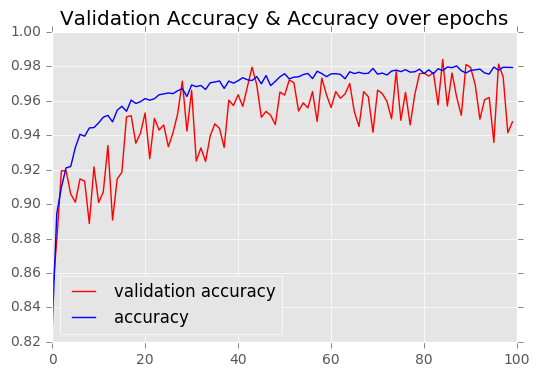

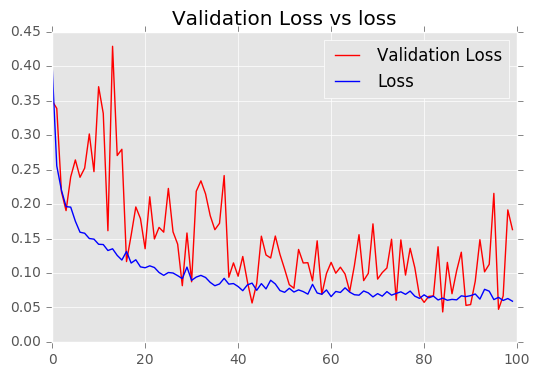

In [3]:
import json
fp = open('history.json', 'r')
history = json.load(fp)
plt.figure()
plt.title("Validation Accuracy & Accuracy over epochs")
plt.plot(range(0, len(history['val_acc'])), history['val_acc'], 'r', label='validation accuracy')
plt.plot(range(0, len(history['acc'])), history['acc'], 'b', label='accuracy')
plt.legend(loc='best')
plt.figure()
plt.title("Validation Loss vs loss")
plt.plot(range(0, len(history['val_loss'])), history['val_loss'], 'r', label='Validation Loss')
plt.plot(range(0, len(history['loss'])), history['loss'], 'b', label='Loss')
plt.legend(loc='best')

# Inception Model

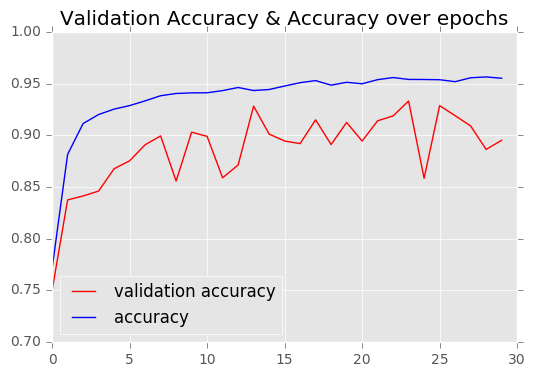

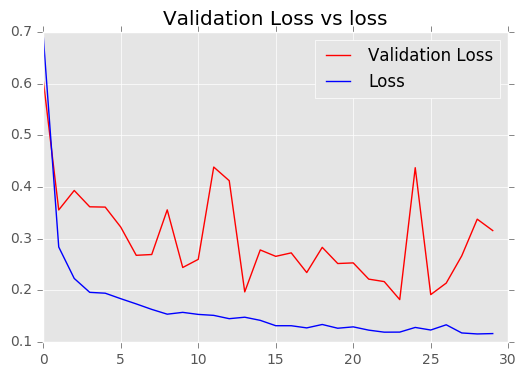

In [3]:
import json
fp = open('history_inception.json', 'r')
history = json.load(fp)
plt.figure()
plt.title("Validation Accuracy & Accuracy over epochs")
plt.plot(range(0, len(history['val_acc'])), history['val_acc'], 'r', label='validation accuracy')
plt.plot(range(0, len(history['acc'])), history['acc'], 'b', label='accuracy')
plt.legend(loc='best')
plt.figure()
plt.title("Validation Loss vs loss")
plt.plot(range(0, len(history['val_loss'])), history['val_loss'], 'r', label='Validation Loss')
plt.plot(range(0, len(history['loss'])), history['loss'], 'b', label='Loss')
plt.legend(loc='best')

In [6]:
from keras.models import load_model
from keras.utils import plot_model
model = load_model('inception.best.h5')
plot_model(model, to_file='output_images/inception_model.png', show_shapes=True, show_layer_names=True)